In [1]:
import orjson
import pandas as pd
import matplotlib.pyplot as plt
from cointegration import calculate_cointegration, calculate_spread, calculate_zscore
%matplotlib inline

In [2]:
market_prices = orjson.loads(open("../../marketPrices.json","r").read())

In [10]:
sym1 = 'AAVE-USD'
sym2 = 'MATIC-USD'

prices1 = [ float(c['close']) for c in market_prices[sym1]]
prices2 = [ float(c['close']) for c in market_prices[sym2]]

zscore_window = 21

coint = calculate_cointegration(prices1, prices2)
spread = calculate_spread(prices1, prices2, coint['hedgeRatio'])
zScore = calculate_zscore(spread, zscore_window)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan -0.06502681  0.07647845  0.25216952  0.41354637
 -0.06648574 -2.28332719 -1.31594386 -0.36631674  0.50143184  0.61863037
  3.05234638  2.27879855  1.39155366  1.25405799  1.08438758  0.64120565
  0.57721982  1.55785766  1.3986136   1.26635739  1.20950891  0.95050885
  1.87297406  1.64280956  1.49462424  1.13177565  0.69533823 -0.17971241
 -0.21299378 -2.29820967 -1.80061225 -1.55225208 -1.08181362 -1.77648461
 -0.54023451 -1.71796581 -0.99989858 -0.7635446  -1.11282836 -1.47367346
 -1.8507754  -1.5206542  -0.64187086 -0.9520563  -1.47495125 -0.5203963
 -1.42258519 -2.35989902 -1.74797308 -0.74832406 -2.1041922  -0.52565548
 -0.896559   -1.43982579 -1.94676821 -1.26052238 -0.6772263  -1.17119308
 -0.23110289 -0.17950341 -0.59134834 -0.34564227 -0.

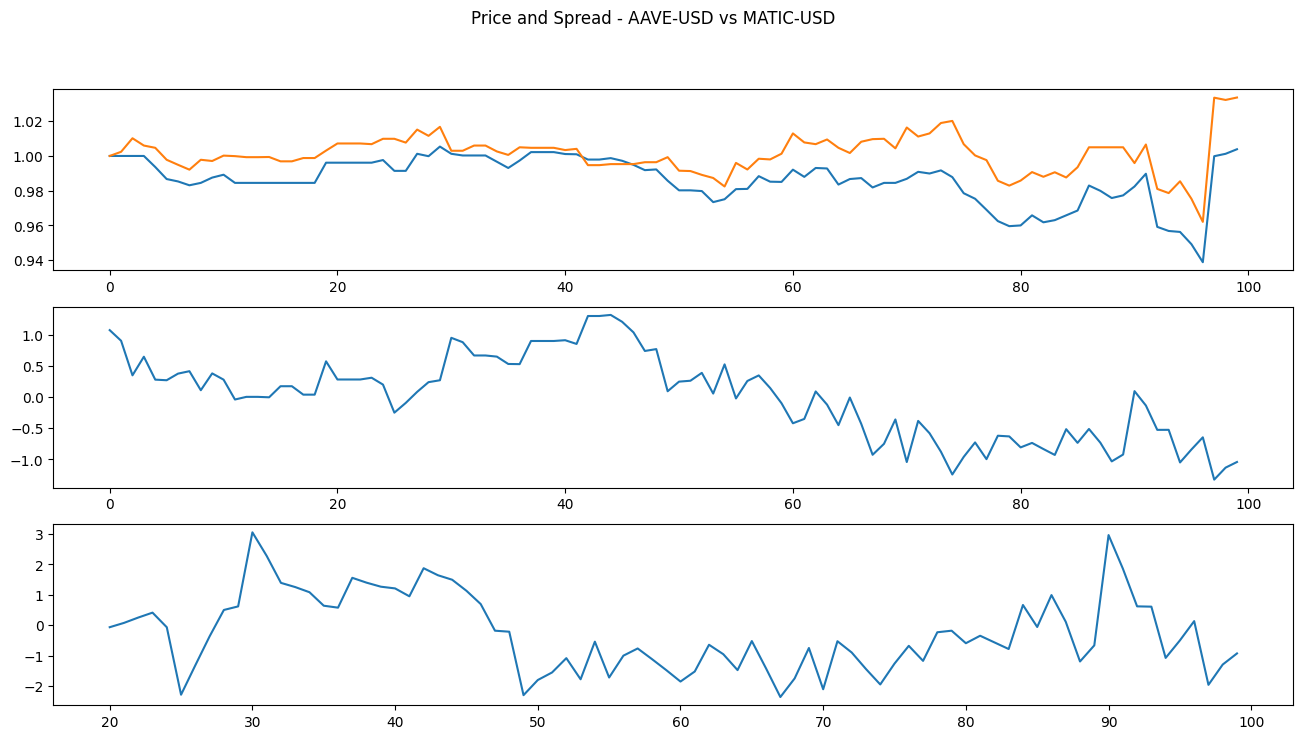

In [11]:
df = pd.DataFrame()
df[sym1] = prices1
df[sym2] = prices2
df[f'{sym1}_pct'] = df[sym1] / prices1[0]
df[f'{sym2}_pct'] = df[sym2] / prices2[0]

series1 = df[f'{sym1}_pct'].astype(float).values
series2 = df[f'{sym2}_pct'].astype(float).values

fig, axs = plt.subplots(3, figsize=(16, 8))
fig.suptitle(f'Price and Spread - {sym1} vs {sym2}')
axs[0].plot(series1)
axs[0].plot(series2)
axs[1].plot(spread)
axs[2].plot(zScore)

plt.show()


In [15]:
df2 = pd.DataFrame()
df2[sym1] = prices1
df2[sym2] = prices2
df2["Spread"] = spread
df2["ZScore"] = zScore 
df2 = df2.dropna(subset=['ZScore'])
df2

,AAVE-USD,MATIC-USD,Spread,ZScore
20,72.02,1.0094,0.281942,-0.065027
21,72.02,1.0094,0.281942,0.076478
22,72.02,1.0094,0.281942,0.252170
23,72.02,1.0090,0.310370,0.413546
24,72.13,1.0121,0.200053,-0.066486
...,...,...,...,...
95,68.63,0.9775,-0.840925,-0.498710
96,67.88,0.9642,-0.645694,0.135045
97,72.29,1.0358,-1.324306,-1.958820
98,72.39,1.0345,-1.131915,-1.291756
